In [1]:
import sys
print(sys.executable)

D:\FH Campus Wien\AI\Lab-2\.venv\Scripts\python.exe


In [2]:
!pip install tensorflow keras numpy matplotlib scikit-learn

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.9/332.0 MB 14.0 MB/s eta 0:00:24
    --------------------------------------- 5.0/332.0 MB 12.4 MB/s eta 0:00:27
    --------------------------------------- 7.1/332.0 MB 11.9 MB/s eta 0:00:28
   - -------------------------------------- 8.4/332.0 MB 10.2 MB/s eta 0:00:32
   - -------------------------------------- 11.0/332.0 MB 10.6 MB/s eta 0:00:31
   - -------------------------------------- 12.8/332.0 MB 10.3 MB/s eta 0:00:32
   - -------------------------------------- 14.9/332.0 MB 10.2 MB/s eta 0:00:32
   -- ------------------------------------- 17.6/332.0 MB 10.6 MB/s eta 0:00:30
   -- ------------------------------------- 19.7/332.0 MB 10.6 MB/s eta 0:00:30
   -- ------------------------------------- 22.3/332.0 MB 10.7 MB/s eta 0:00:29
   --- ------------------------------------ 24.9/332.0 MB 10.9 MB/s eta 0:00:29
   --- ------------------------------------ 27.5/332.

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [2]:
!pip install --no-cache-dir tensorflow keras numpy matplotlib scikit-learn


In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)
print("NumPy:", np.__version__)


TensorFlow: 2.20.0
Keras: 3.12.0
NumPy: 2.3.4


In [6]:
# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

# Load data 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of test samples: 10000


C:\Users\Svetlana\AppData\Local\Temp\ipykernel_12372\2480943932.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_names[int(y_train[k])]


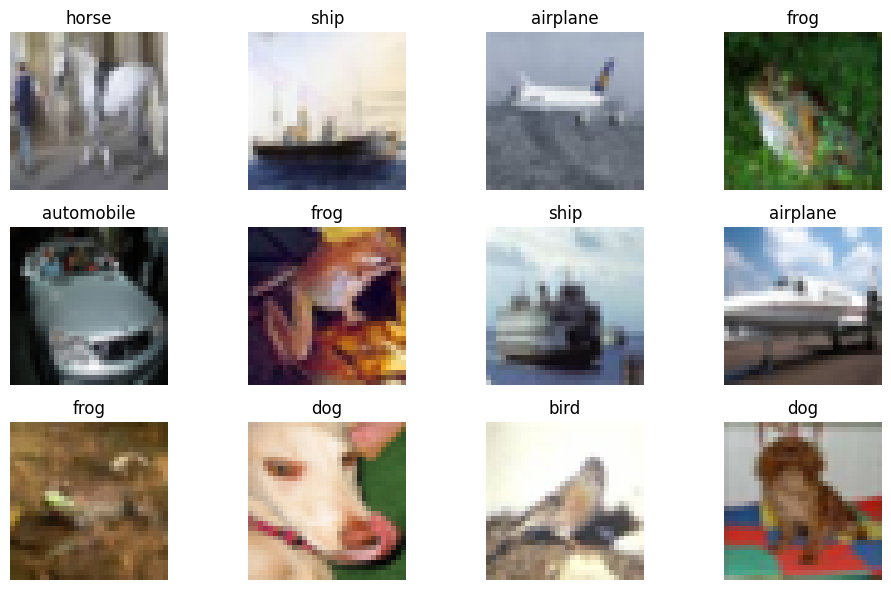

In [7]:
# Step 2: Inspect a few CIFAR-10 images (visual sanity check)

import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names in the canonical order
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Show 12 random training images with their labels
np.random.seed(42)
idx = np.random.choice(len(x_train), size=12, replace=False)

plt.figure(figsize=(10, 6))
for i, k in enumerate(idx, 1):
    plt.subplot(3, 4, i)
    plt.imshow(x_train[k])
    label = class_names[int(y_train[k])]
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
#  Normalize the data (convert pixel values to [0,1] range)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels from arrays to integers
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Data normalized. Example pixel value range:", x_train.min(), "to", x_train.max())
print("Labels converted to 1D arrays. Example:", y_train[:10])


Data normalized. Example pixel value range: 0.0 to 1.0
Labels converted to 1D arrays. Example: [6 9 9 4 1 1 2 7 8 3]


In [10]:
# Machine Learning baseline model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [13]:
# Flatten 32x32x3 images into 1D vectors (3072 features)
X_train_flat = x_train.reshape((x_train.shape[0], -1))

In [14]:
X_test_flat = x_test.reshape((x_test.shape[0], -1))

In [16]:
# Scale the data (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)